In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [3]:
dataset = pd.read_csv('/Users/prakhar/Desktop/project 2/env/survey lung cancer.csv')
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
dataset = dataset.replace({1: 0, 2: 1})
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


label encoding for gender categorical column

In [5]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
label_encoder_gender = LabelEncoder()
dataset["GENDER"] = label_encoder_gender.fit_transform(dataset["GENDER"])


label encoding for lung cancer categorical column

In [6]:
label_encoder_lungs = LabelEncoder()
dataset["LUNG_CANCER"] = label_encoder_lungs.fit_transform(dataset["LUNG_CANCER"])

In [7]:
from sklearn.model_selection import train_test_split

saving pickle files of gender and cancer lungs encoding

In [36]:
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)
with open('label_encoder_lungs.pkl','wb')as file:
    pickle.dump(label_encoder_lungs,file)

splitting test train data and scalling training dataset

In [9]:
X = dataset.drop('LUNG_CANCER' , axis = 1)
y = dataset['LUNG_CANCER']

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

saving scaler pickle file

In [10]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

# ANN IMPLIMENTATION

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping , TensorBoard
import datetime

In [60]:
model = Sequential([
    Dense(64, activation= 'relu' , input_shape = (X_train.shape[1],)),
    Dense(32 , activation = 'relu'),
    Dense(1 , activation='sigmoid')

]
)

/Users/prakhar/Desktop/project 2/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.05)

In [63]:
model.compile(optimizer = opt , loss = "binary_crossentropy" , metrics = ['accuracy'] )

In [64]:
log_dir = "ogs/fit/" +datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
tensorflow_callback = TensorBoard(log_dir = log_dir , histogram_freq=1)

In [65]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss' , patience = 10 , restore_best_weights = True)

In [66]:
history = model.fit(
    X_train  ,y_train , validation_data = (X_test , y_test),
    epochs = 100 , callbacks = [tensorflow_callback , early_stopping_callback]
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6818 - loss: 0.5453 - val_accuracy: 0.9677 - val_loss: 0.1162
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.2235 - val_accuracy: 0.9677 - val_loss: 0.1113
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8392 - loss: 0.2030 - val_accuracy: 0.9516 - val_loss: 0.1139
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9290 - loss: 0.1624 - val_accuracy: 0.9516 - val_loss: 0.1129
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9437 - loss: 0.1419 - val_accuracy: 0.9355 - val_loss: 0.1284
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9494 - loss: 0.1317 - val_accuracy: 0.9516 - val_loss: 0.1268
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9438 - loss: 0.1196 - val_accuracy: 0.9516 - val_loss: 0.1195
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9612 - loss: 0.1025 - val_accuracy: 0.9516 - val_loss: 0.0965


In [67]:
model.save('model.h5')

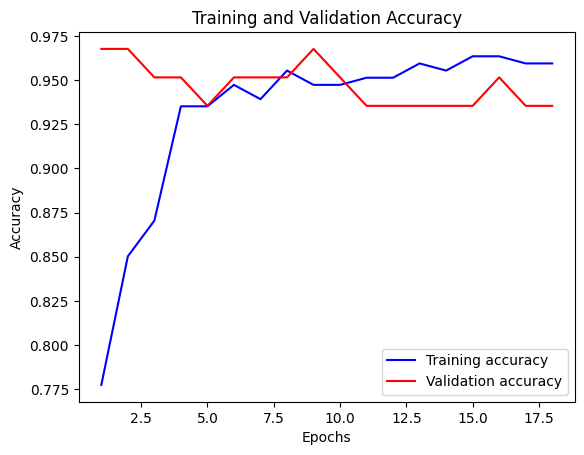

In [68]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()